In [16]:
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%matplotlib inline

In [17]:
df = pd.read_csv(r'Handicap Stats.csv')
df.head()

,Handicap,Avg Score to Par,Score by Hole Type - 3,Score by Hole Type - 4,Score by Hole Type - 5,FIR,FIR_Left,FIR_Right,Avg Drive Dist,GIR,...,GIR % 9i,GIR % PW,GIR % AW,GIR % SW,GIR % LW,Up Downs,Avg Proximity,Putts per Rd,Make Rate Inside 6ft,2 Putt Pct
0,20,23.2,4.0,5.4,6.4,0.479,0.233,0.281,218.8,0.154,...,0.250,0.348,0.418,0.422,0.470,0.298,19.9,32.6,0.837,0.605
1,19,21.9,4.0,5.3,6.3,0.481,0.236,0.278,221.7,0.169,...,0.267,0.357,0.432,0.436,0.476,0.309,19.4,32.4,0.840,0.605
2,18,20.7,3.9,5.3,6.2,0.482,0.239,0.275,224.6,0.184,...,0.285,0.366,0.445,0.450,0.483,0.320,18.9,32.3,0.844,0.605
3,17,19.4,3.9,5.2,6.1,0.483,0.242,0.272,227.6,0.201,...,0.302,0.376,0.458,0.464,0.490,0.331,18.4,32.1,0.848,0.604
4,16,18.2,3.8,5.1,6.0,0.484,0.245,0.269,230.5,0.218,...,0.319,0.386,0.472,0.478,0.498,0.342,18.0,32.0,0.852,0.604


In [18]:
print("\nDataset Information (columns, non-null counts, data types):")
df.info()

print("\nDescriptive Statistics for numerical columns:")
print(df.describe())


Dataset Information (columns, non-null counts, data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Handicap                30 non-null     int64  
 1   Avg Score to Par        30 non-null     float64
 2   Score by Hole Type - 3  30 non-null     float64
 3   Score by Hole Type - 4  30 non-null     float64
 4   Score by Hole Type - 5  30 non-null     float64
 5   FIR                     30 non-null     float64
 6   FIR_Left                30 non-null     float64
 7   FIR_Right               30 non-null     float64
 8   Avg Drive Dist          30 non-null     float64
 9   GIR                     30 non-null     float64
 10  GIR % Hyb               30 non-null     float64
 11  GIR % 4i                30 non-null     float64
 12  GIR % 5i                30 non-null     float64
 13  GIR % 6i                30 non-null 


--- Correlation Analysis with 'Handicap' ---

Features sorted by correlation with 'Handicap' (strongest negative first):
  Avg Drive Dist: -1.000
  GIR % AW: -1.000
  GIR % 9i: -1.000
  FIR: -1.000
  GIR % SW: -0.999
  GIR % Hyb: -0.999
  Up Downs: -0.997
  GIR % 4i: -0.996
  GIR % 6i: -0.996
  Make Rate Inside 6ft: -0.995
  GIR % PW: -0.992
  GIR: -0.989
  GIR % 5i: -0.987
  GIR % 7i: -0.987
  GIR % 8i: -0.987
  GIR % LW: -0.973
  FIR_Left: -0.327
  Avg Proximity: 0.320
  FIR_Right: 0.901
  2 Putt Pct: 0.990
  Score by Hole Type - 5: 0.994
  Score by Hole Type - 3: 0.997
  Avg Score to Par: 0.998
  Score by Hole Type - 4: 0.999
  Putts per Rd: 1.000

--- Visualizing Top Drivers ---

Generating scatter plots for: Putts per Rd, FIR, Avg Score to Par, Score by Hole Type - 3, GIR % SW, Avg Drive Dist, Score by Hole Type - 4, GIR % 9i, GIR % AW, Score by Hole Type - 5


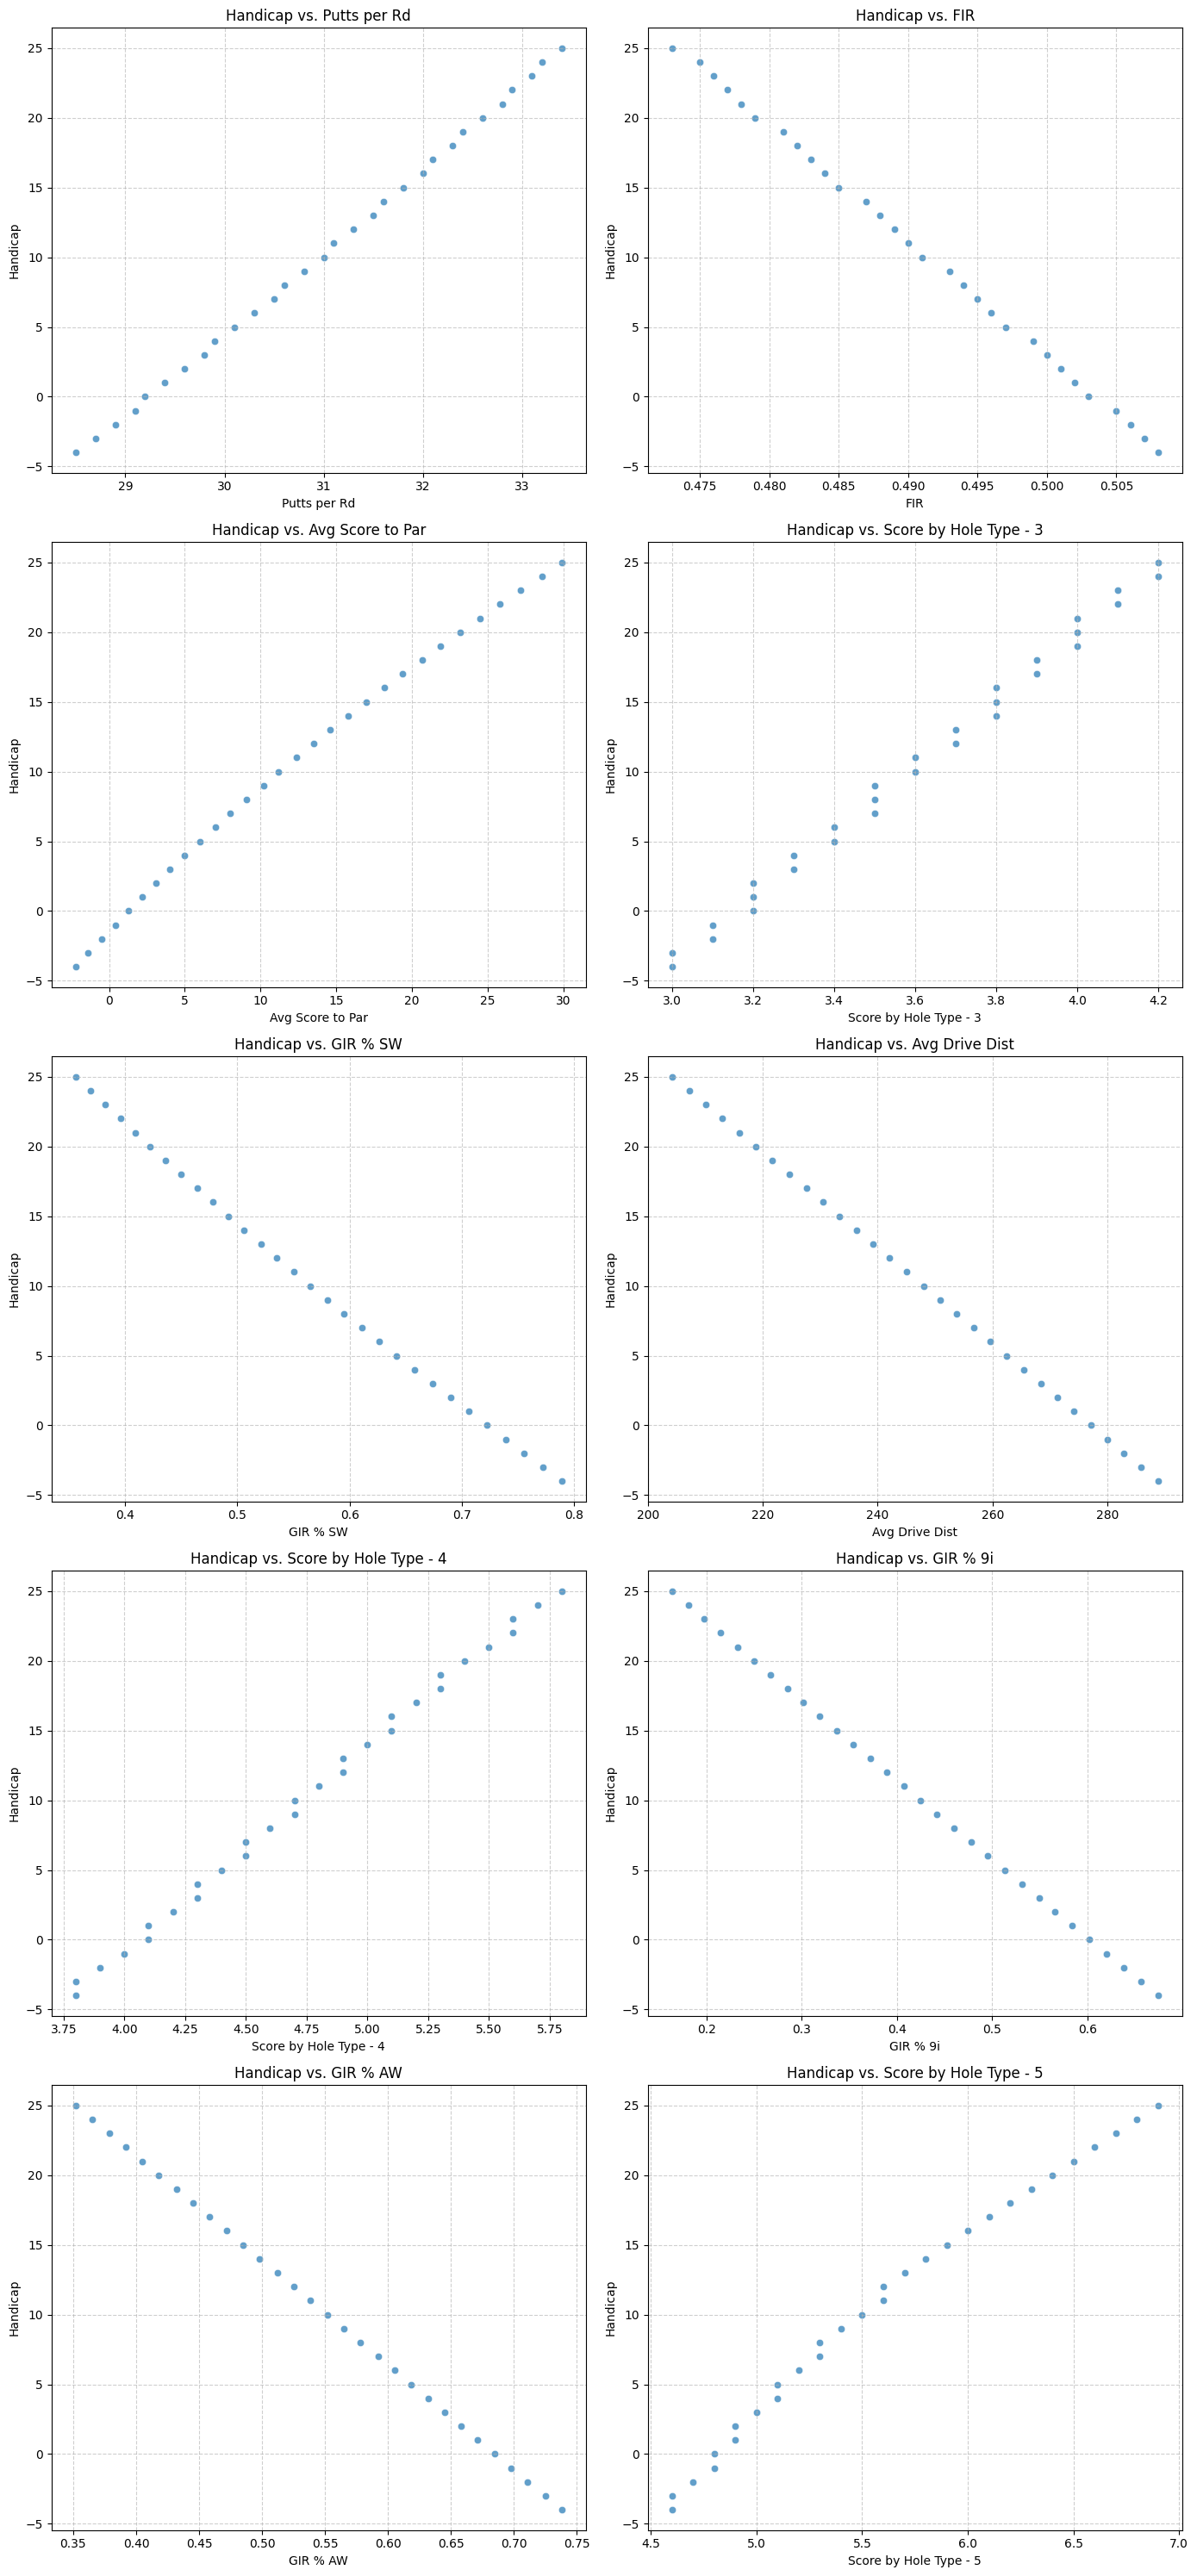


Scatter plots displayed. Look for downward trends for negative correlations and upward trends for positive correlations.

--- Personalized Advice for a 16 Handicap Golfer ---
To move from a 16 handicap towards a 15 handicap, focus on the following key areas based on your data:
  - **Improve Avg Drive Dist:** This metric has a strong negative correlation (-1.00) with handicap. Increasing your performance in Avg Drive Dist (e.g., hitting the ball further, hitting more greens, etc.) is highly likely to reduce your handicap.
  - **Improve GIR % AW:** This metric has a strong negative correlation (-1.00) with handicap. Increasing your performance in GIR % AW (e.g., hitting the ball further, hitting more greens, etc.) is highly likely to reduce your handicap.
  - **Improve GIR % 9i:** This metric has a strong negative correlation (-1.00) with handicap. Increasing your performance in GIR % 9i (e.g., hitting the ball further, hitting more greens, etc.) is highly likely to reduce your handicap

In [24]:
current_handicap_focus = 16

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'Handicap' in numerical_cols:
    numerical_cols.remove('Handicap')
else:
    print("Warning: 'Handicap' column is not numerical. Please check data types.")
    

if not numerical_cols:
    print("No other numerical columns found for correlation analysis besides 'Handicap'.")
    

# --- Correlation Analysis ---
print("\n--- Correlation Analysis with 'Handicap' ---")
correlations = {}
for col in numerical_cols:
    corr, _ = pearsonr(df[col], df['Handicap'])
    correlations[col] = corr

sorted_correlations = sorted(correlations.items(), key=lambda item: item[1])

print("\nFeatures sorted by correlation with 'Handicap' (strongest negative first):")
for feature, corr_val in sorted_correlations:
    print(f"  {feature}: {corr_val:.3f}")

# --- Visualization of Top Drivers ---
print("\n--- Visualizing Top Drivers ---")
top_negative_drivers = [item[0] for item in sorted_correlations if item[1] < -0.2][:5]
top_positive_drivers = [item[0] for item in sorted_correlations if item[1] > 0.2][-5:]

drivers_to_plot = top_negative_drivers + top_positive_drivers
drivers_to_plot = list(set(drivers_to_plot))

if not drivers_to_plot:
    print("No strong drivers found to visualize based on current thresholds.")
else:
    print(f"\nGenerating scatter plots for: {', '.join(drivers_to_plot)}")
    num_plots = len(drivers_to_plot)
    if num_plots > 0:
        # Dynamically adjust rows based on number of plots
        n_rows = (num_plots + 1) // 2 if num_plots > 1 else 1
        fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(14, 6 * n_rows))
        axes = axes.flatten()

        for i, driver in enumerate(drivers_to_plot):
            sns.scatterplot(x=df[driver], y=df['Handicap'], ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Handicap vs. {driver}')
            axes[i].set_xlabel(driver)
            axes[i].set_ylabel('Handicap')
            axes[i].grid(True, linestyle='--', alpha=0.6)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
        print("\nScatter plots displayed. Look for downward trends for negative correlations and upward trends for positive correlations.")

# --- Personalized Advice based on current_handicap_focus ---
if current_handicap_focus is not None:
    target_handicap = current_handicap_focus - 1
    print(f"\n--- Personalized Advice for a {current_handicap_focus} Handicap Golfer ---")
    print(f"To move from a {current_handicap_focus} handicap towards a {target_handicap} handicap, focus on the following key areas based on your data:")

    advice_given = False
    # Recommend improving stats with strong negative correlation (increase these values)
    for feature, corr_val in sorted_correlations:
        if corr_val < -0.3: # Threshold for 'strong' negative correlation
            print(f"  - **Improve {feature}:** This metric has a strong negative correlation ({corr_val:.2f}) with handicap. Increasing your performance in {feature} (e.g., hitting the ball further, hitting more greens, etc.) is highly likely to reduce your handicap.")
            advice_given = True
    
    # Recommend improving stats with strong positive correlation (decrease these values)
    # Iterate in reverse for positive correlations to get strongest first
    for feature, corr_val in reversed(sorted_correlations):
        if corr_val > 0.3: # Threshold for 'strong' positive correlation
            print(f"  - **Reduce {feature}:** This metric has a strong positive correlation ({corr_val:.2f}) with handicap. Decreasing your performance in {feature} (e.g., fewer putts, fewer penalty strokes, etc.) is highly likely to reduce your handicap.")
            advice_given = True

    if not advice_given:
        print("No strong correlations found to provide specific advice based on the current data and thresholds. Your golf game might have a balanced set of strengths and weaknesses, or more data might be needed.")

print("\n--- Analysis Complete ---")


--- Visualizing Top Drivers ---

Generating scatter plots for: Putts per Rd, FIR, Avg Score to Par, Score by Hole Type - 3, GIR % SW, Avg Drive Dist, Score by Hole Type - 4, GIR % 9i, GIR % AW, Score by Hole Type - 5


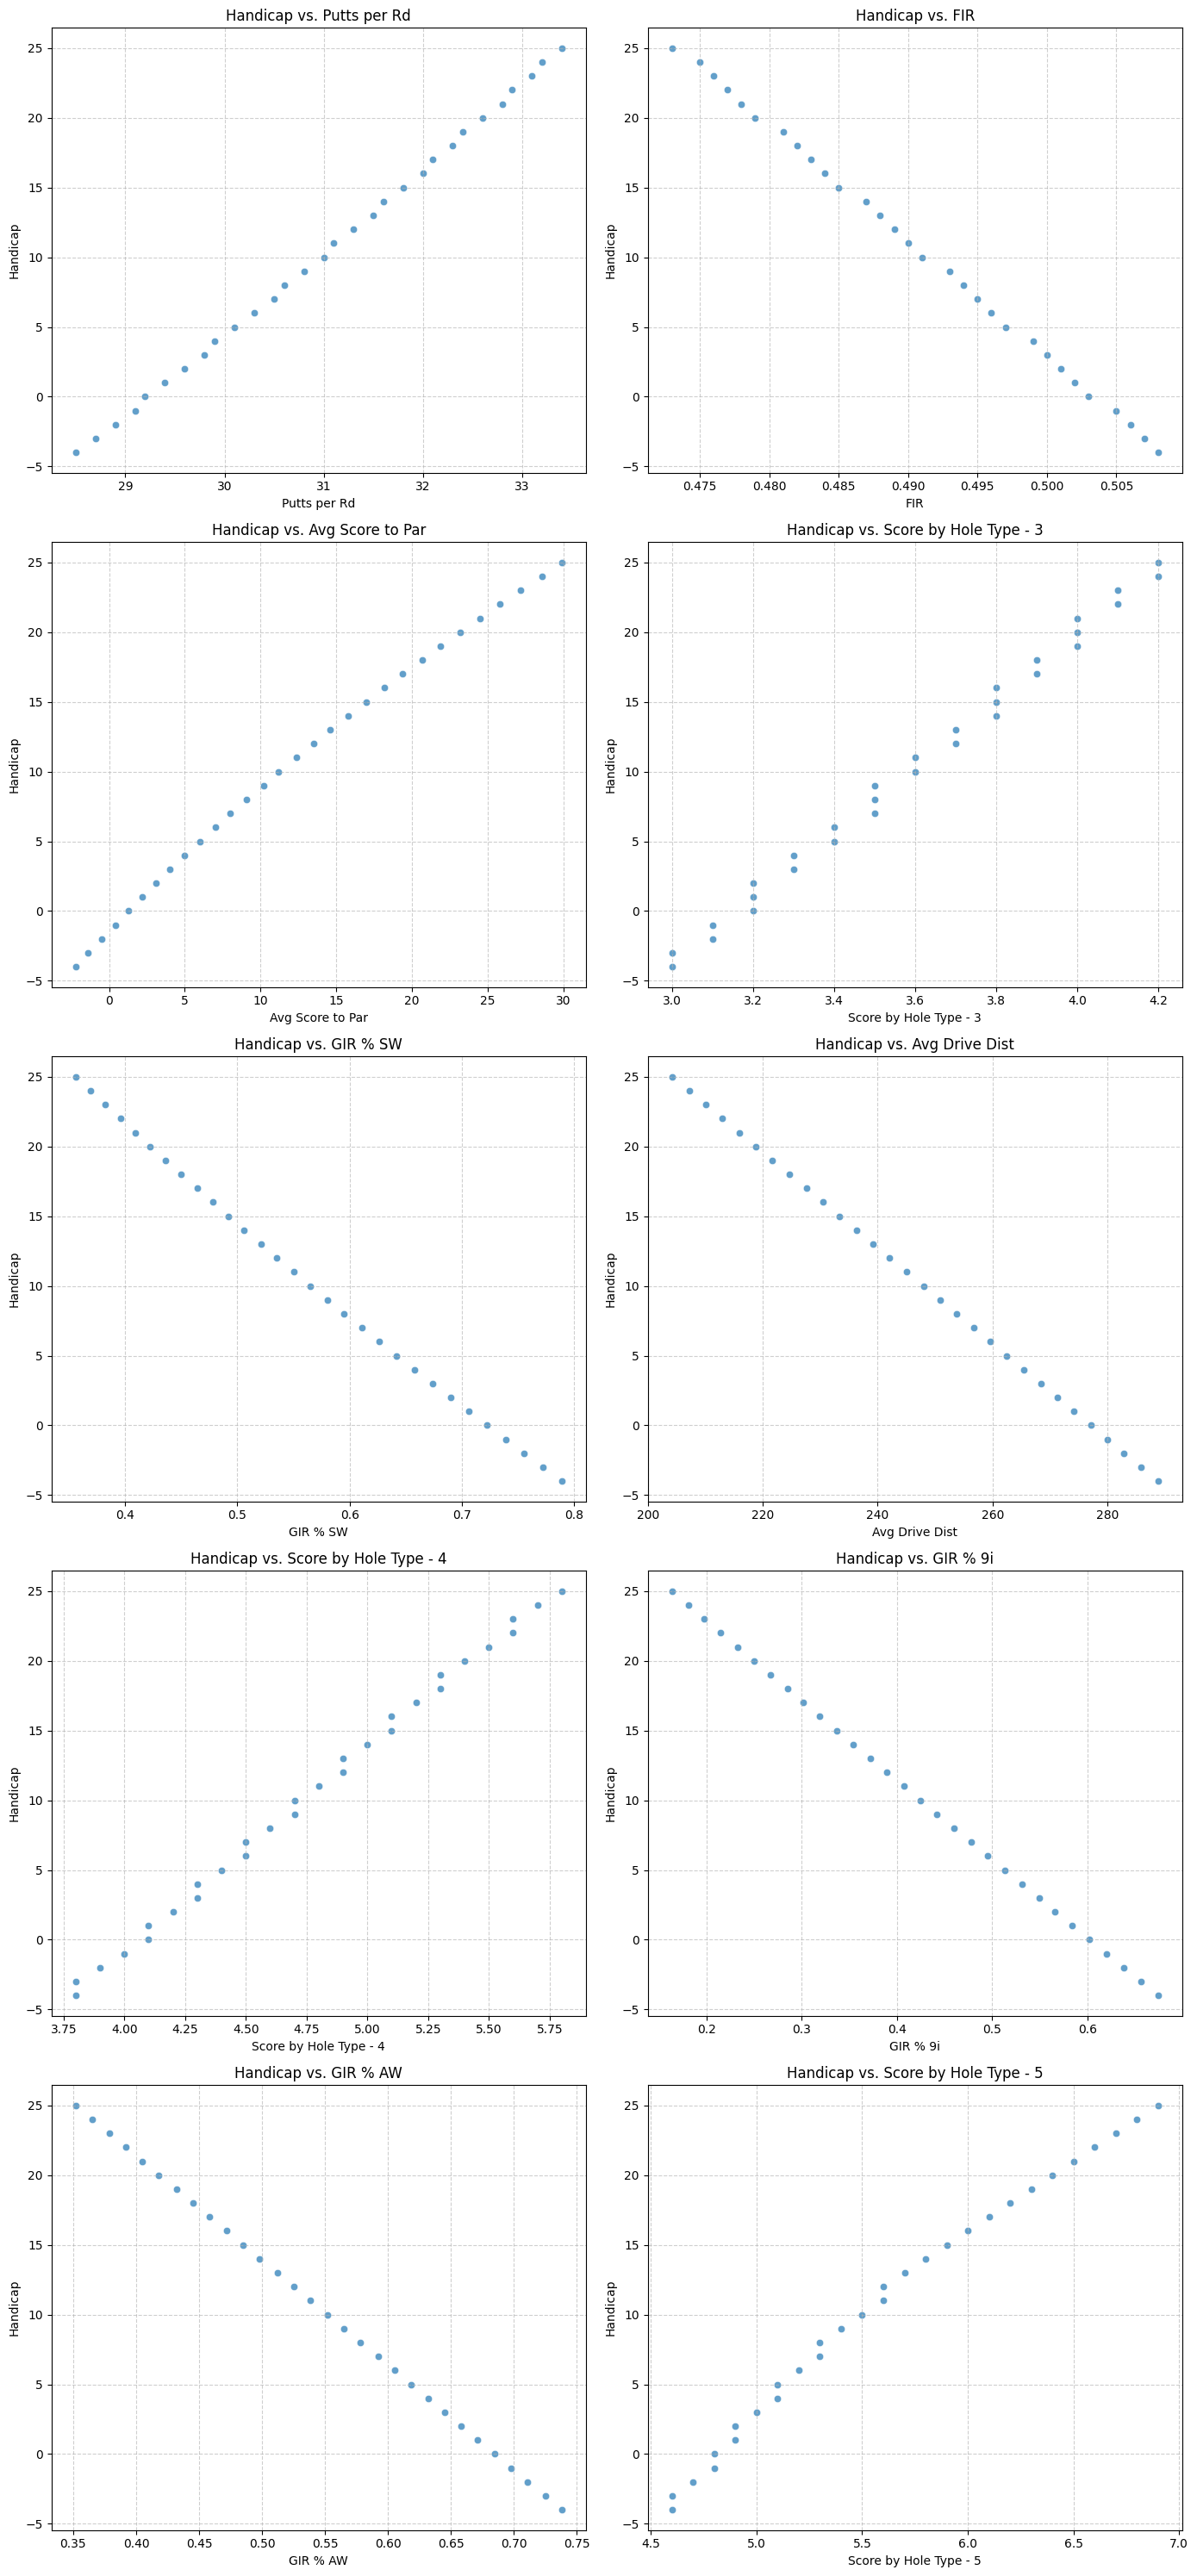


Scatter plots displayed. Look for downward trends for negative correlations and upward trends for positive correlations.

--- Analysis Complete ---


In [21]:
# --- Visualization of Top Drivers ---
print("\n--- Visualizing Top Drivers ---")

# Select top N most negatively correlated features for visualization
# Let's pick the top 3-5 negative correlations and top 3-5 positive correlations
top_negative_drivers = [item[0] for item in sorted_correlations if item[1] < -0.2][:5] # Adjust threshold as needed
top_positive_drivers = [item[0] for item in sorted_correlations if item[1] > 0.2][-5:] # Adjust threshold as needed

drivers_to_plot = top_negative_drivers + top_positive_drivers
drivers_to_plot = list(set(drivers_to_plot)) # Remove duplicates if any

if not drivers_to_plot:
    print("No strong drivers found to visualize based on current thresholds.")
else:
    print(f"\nGenerating scatter plots for: {', '.join(drivers_to_plot)}")
    num_plots = len(drivers_to_plot)
    if num_plots > 0:
        fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(14, 6 * ((num_plots + 1) // 2)))
        axes = axes.flatten() # Flatten in case of single row/column

        for i, driver in enumerate(drivers_to_plot):
            sns.scatterplot(x=df[driver], y=df['Handicap'], ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Handicap vs. {driver}')
            axes[i].set_xlabel(driver)
            axes[i].set_ylabel('Handicap')
            axes[i].grid(True, linestyle='--', alpha=0.6)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
        print("\nScatter plots displayed. Look for downward trends for negative correlations and upward trends for positive correlations.")

print("\n--- Analysis Complete ---")